In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime


In [2]:
fasted_base = "data_controlled_temp/fasted/"
satiated_base = "data_controlled_temp/satiated/"

# fasted_base = "data/fasted/"
# satiated_base = "data/satiated/"


(2200, 13)
(2200, 13)


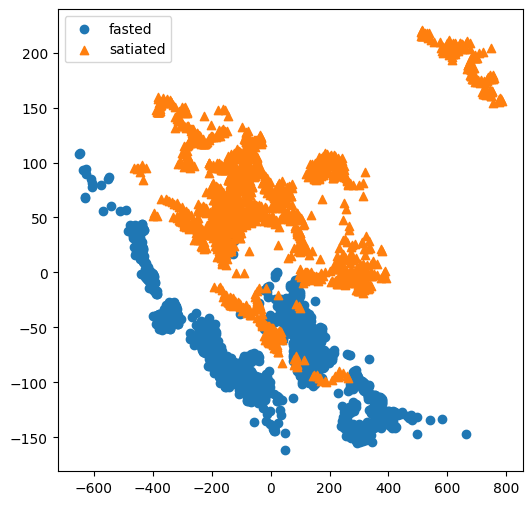

In [22]:
def get_data(base):
    data = []
    for i, filename in enumerate(sorted(os.listdir(base))):
        data.append(np.loadtxt(base + filename, skiprows=1, delimiter=',')[:, 6:])
    return data

fasted_data = get_data(fasted_base)
satiated_data = get_data(satiated_base)

all_fasted_data = np.concatenate(fasted_data)
all_satiated_data = np.concatenate(satiated_data)

all_data = np.concatenate((all_fasted_data, all_satiated_data))

print(all_fasted_data.shape)
print(all_satiated_data.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(all_data)

fasted_transformed = pca.transform(all_fasted_data)
satiated_transformed = pca.transform(all_satiated_data)

plt.figure(figsize=(6, 6))

# plt.subplot(1, 2, 1)

plt.scatter(fasted_transformed[:, 0], fasted_transformed[:, 1], marker='o', label='fasted')
plt.scatter(satiated_transformed[:, 0], satiated_transformed[:, 1], marker='^', label='satiated')
plt.legend()

# plt.subplot(1, 2, 2)

# plt.scatter(satiated_transformed[:, 0], satiated_transformed[:, 1], marker='^', label='satiated')
# plt.scatter(fasted_transformed[:, 0], fasted_transformed[:, 1], marker='o', label='fasted')
# plt.legend()

plt.savefig('pca-noUV.png')
plt.show()

# print(pca.explained_variance_ratio_)


In [41]:
def get_data_by_date(base):
    data = {}
    for i, filename in enumerate(sorted(os.listdir(base))):
        
        f = open(base + filename, 'r')
        date = datetime.strptime(f.readline(), '%Y-%m-%d %H:%M:%S.%f\n')
        f.close()
        
        key = f'{date.year}-{date.month}-{date.day:02d}'
        
        if key not in data:
            data[key] = []
            
        data[key].append(np.loadtxt(base + filename, skiprows=1, delimiter=',')[:, 6:])
    
    return data

(2200, 13)
(2200, 13)


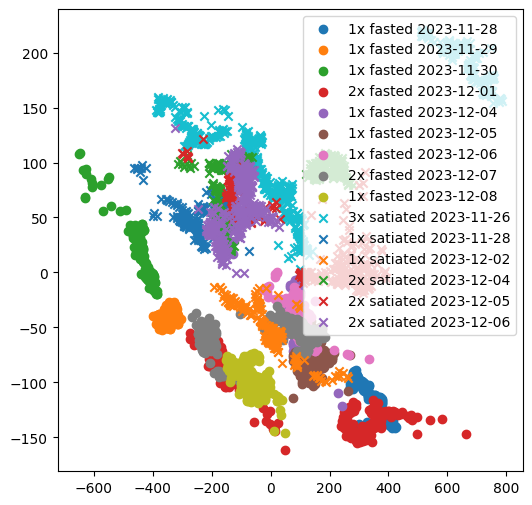

In [46]:
def get_data(base):
    data = []
    for i, filename in enumerate(sorted(os.listdir(base))):
        
        data.append(np.loadtxt(base + filename, skiprows=1, delimiter=',')[:, 6:])
    return data

fasted_data = get_data(fasted_base)
satiated_data = get_data(satiated_base)

all_fasted_data = np.concatenate(fasted_data)
all_satiated_data = np.concatenate(satiated_data)

all_data = np.concatenate((all_fasted_data, all_satiated_data))

print(all_fasted_data.shape)
print(all_satiated_data.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(all_data)

fasted_data_by_date = get_data_by_date(fasted_base)
satiated_data_by_date = get_data_by_date(satiated_base)

fasted_transformed = pca.transform(all_fasted_data)
satiated_transformed = pca.transform(all_satiated_data)

# plt.figure(figsize=(15, 6))

# plt.subplot(1, 2, 1)

# for key, data in fasted_data_by_date.items():
#     cnt = len(data)
#     data = np.concatenate(data)
#     transformed = pca.transform(data)
#     plt.scatter(transformed[:, 0], transformed[:, 1], marker='o', label=f'{cnt}x fasted {key}')

# plt.legend()

# plt.subplot(1, 2, 2)

# for key, data in satiated_data_by_date.items():
#     cnt = len(data)
#     data = np.concatenate(data)
#     transformed = pca.transform(data)
#     plt.scatter(transformed[:, 0], transformed[:, 1], marker='^', label=f'{cnt}x satiated {key}')

# plt.legend()

# plt.show()

plt.figure(figsize=(8, 8))

for key, data in sorted(fasted_data_by_date.items()):
    cnt = len(data)
    data = np.concatenate(data)
    transformed = pca.transform(data)
    plt.scatter(transformed[:, 0], transformed[:, 1], marker='o', label=f'{cnt}x fasted {key}')

for key, data in sorted(satiated_data_by_date.items()):
    cnt = len(data)
    data = np.concatenate(data)
    transformed = pca.transform(data)
    plt.scatter(transformed[:, 0], transformed[:, 1], marker='x', label=f'{cnt}x satiated {key}')

plt.legend()

plt.savefig('pca-noUV-oponent.png')

plt.show()
